Давайте познакомимся с одним из способов выделения трендовой и сезонной компонент ряда и визуального анализа шума.

In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot

df = pd.read_csv('AirPassengers.csv') # считываем датасет
df.columns = (['Month','Pass']) # заменяем название столбца '#Passenger' на 'Pass' чтобы избежать путаницы с комментариями
df.head() # смотрим на первые несколько строчек

,Month,Pass
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [2]:
# приводим индексы к стандарту pd.Datetime, чтобы потом это можно было скормить seasonal_decompose
df = df.set_index(pd.DatetimeIndex(df['Month'])) 
df.head() # смотрим на результат

,Month,Pass
Month,,
1949-01-01,1949-01,112
1949-02-01,1949-02,118
1949-03-01,1949-03,132
1949-04-01,1949-04,129
1949-05-01,1949-05,121


In [3]:
 # замечаем, что т.к. у нас теперь есть индекс Month, нам больше не нужен столбец Month, который его дублирует
df.drop(['Month'], axis = 1, inplace = True)
df.head() # снова проверяем, что все в порядке. вообще проверять данные на каждом шаге кода - хорошая привычка

,Pass
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


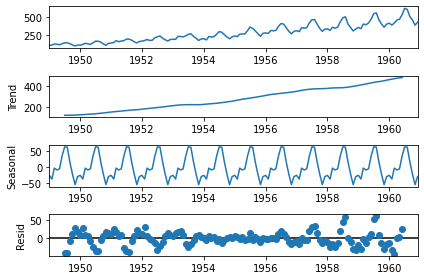

In [4]:
# применяем seasonal_decompose
# эта функция разложит ряд на трендовую, сезонную и шумовую составляющие
decomposition = seasonal_decompose(df, model='additive') 
decomposition.plot()
pyplot.show() # любуемся результатом

In [5]:
trend_part = decomposition.trend # отдельно трендовая составляющаяя
seasonal_part = decomposition.seasonal # отдельно сезонная составляющаяя
residual_part = decomposition.resid # отдельно шум: то, что осталось

In [6]:
# посмотрим повнимательнее на остатки в начале ряда
residual_part.head()

Month
1949-01-01   NaN
1949-02-01   NaN
1949-03-01   NaN
1949-04-01   NaN
1949-05-01   NaN
Name: resid, dtype: float64

In [7]:
# посмотрим повнимательнее на остатки в конце ряда
residual_part.tail()

Month
1960-08-01   NaN
1960-09-01   NaN
1960-10-01   NaN
1960-11-01   NaN
1960-12-01   NaN
Name: resid, dtype: float64

In [8]:
# в конце и в начале стоят значения NaN. Это связано с особенностями алгоритма seasonal_decompose
# если мы хотим далее анализировать остатки, необходимо избавиться от этих некорректных значений
residual_part = residual_part.dropna()
residual_part.head()

Month
1949-07-01   -42.622475
1949-08-01   -42.073232
1949-09-01    -8.478535
1949-10-01    11.059343
1949-11-01    28.593434
Name: resid, dtype: float64

Анализ результата:

В ряде явно присутствует тренд на рост и ярко выражена годовая сезонность

Остатки ряда не похожи не хаотичный белый шум и скорее всего все еще содержат закономерности

In [9]:
df = pd.read_csv('candy_production.csv') # считываем датасет
 # заменяем название столбца '#Passenger' на 'Pass' чтобы избежать путаницы с комментариями
df.head() # смотрим на первые несколько строчек

,observation_date,IPG3113N
0,1972-01-01,85.6945
1,1972-02-01,71.8200
2,1972-03-01,66.0229
3,1972-04-01,64.5645
4,1972-05-01,65.0100


In [10]:
df.shape

(548, 2)

In [11]:
df = df.set_index(pd.DatetimeIndex(df['observation_date'])) 
df.head()

,observation_date,IPG3113N
observation_date,,
1972-01-01,1972-01-01,85.6945
1972-02-01,1972-02-01,71.8200
1972-03-01,1972-03-01,66.0229
1972-04-01,1972-04-01,64.5645
1972-05-01,1972-05-01,65.0100


In [12]:
df.drop(['observation_date'], axis = 1, inplace = True)
df.head()

,IPG3113N
observation_date,
1972-01-01,85.6945
1972-02-01,71.8200
1972-03-01,66.0229
1972-04-01,64.5645
1972-05-01,65.0100


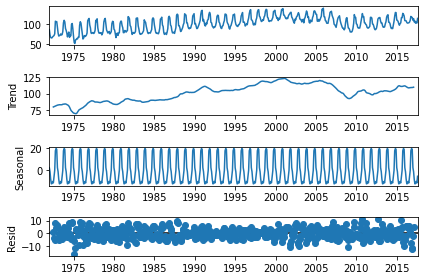

In [13]:
decomposition = seasonal_decompose(df, model='additive') 
decomposition.plot()
pyplot.show()

In [19]:
decomposition

In [14]:
trend_part = decomposition.trend # отдельно трендовая составляющаяя
seasonal_part = decomposition.seasonal # отдельно сезонная составляющаяя
residual_part = decomposition.resid # отдельно шум: то, что осталось

In [15]:
residual_part.shape

(548,)

In [16]:
residual_part = residual_part.dropna()

In [17]:
residual_part

observation_date
1972-07-01     0.585060
1972-08-01    -4.098878
1972-09-01    -5.638989
1972-10-01     8.035513
1972-11-01     4.132112
                ...    
2016-10-01    -7.826012
2016-11-01   -12.238976
2016-12-01   -11.886948
2017-01-01    -2.359511
2017-02-01     5.045926
Name: resid, Length: 536, dtype: float64

In [18]:
seasonal_part.isna().sum()

0